**Feature Extraction from the dataset**

In [7]:
import pandas as pd
import re
from urllib.parse import urlparse

In [18]:
common_short_url = ['bit.ly', 'tinyurl.com', 't.co', 'goo.gl', 'ow.ly', 'buff.ly', 'is.gd', 'adf.ly', 'sniply.io', 'dub.co', 'short.io', 'ZipZy.in']

def extract_url_features(url):
    parsed = urlparse(url)
    domain = parsed.netloc
    path = parsed.path
    
    unsafe_chars = set(' "<>#%{}|\\^[]~`')
    return {
        "url_len": len(url),
        "num_unsafe_chars": sum(1 for char in url if char in unsafe_chars),
        "num_digits": sum(c.isdigit() for c in url),
        "num_subdomains": domain.count('.'),
        "is_ip": bool(re.match(r'\d+\.\d+\.\d+\.\d+', domain)), 
        "num_params": url.count('?'),
        "num_slashes": url.count('/'),    #directory depth and obfuscation
        "contains_suspicious_keywords": any(word in url.lower() for word in ["login", "secure", "verify", "bank", "auth"]),
        "contains_suspicious_file_extension": any(ext in path.lower() for ext in ['.exe', '.zip', '.js', '.php']),
        "short_url": any(short in domain for short in common_short_url),  
    }

df = pd.read_csv("dataset\kaggle_malicious_url.csv")
features_df = pd.DataFrame(df["url"].apply(extract_url_features).tolist())
df = pd.concat([df, features_df], axis=1)
df.to_csv("processed_dataset.csv", index=False)
print("Feature extraction completed and saved.")

Feature extraction completed and saved.


In [19]:
df

,url,type,url_len,num_unsafe_chars,num_digits,num_subdomains,is_ip,num_params,num_slashes,contains_suspicious_keywords,contains_suspicious_file_extension,short_url
0,br-icloud.com.br,phishing,16,0,0,0,False,0,0,False,False,False
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,1,0,False,0,2,False,False,False
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,1,0,False,0,3,False,False,False
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,7,2,False,1,3,False,True,False
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,22,1,False,1,3,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,benign,39,0,12,0,False,0,3,False,False,False
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,benign,44,0,7,0,False,0,4,False,False,False
651188,www.gamespot.com/xbox360/action/deadspace/,benign,42,0,3,0,False,0,4,False,False,False
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),benign,45,0,0,0,False,0,2,False,False,False


**Evaluating Feature Correlation**

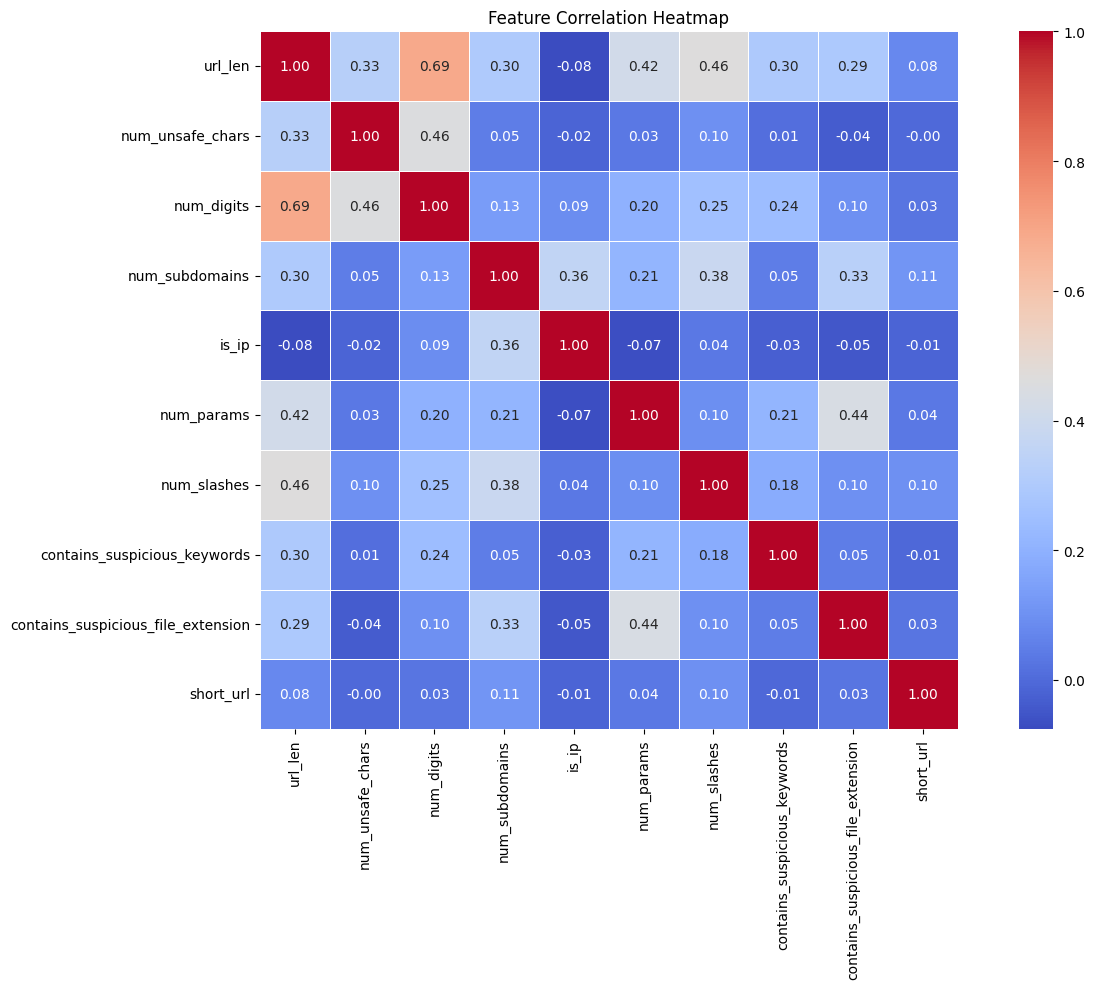

In [20]:
features = pd.read_csv("processed_dataset.csv")
corr_matrix = features.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
